In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import metrics 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
  
import warnings 
warnings.filterwarnings('ignore')

## Loading the dataset

In [99]:
df = pd.read_csv('BikeRental.csv') 
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [100]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [101]:
# data shape
df.shape

(8760, 14)

In [102]:
# converting the Date column in to individual column
parts = df["Date"].str.split("/", n=3, expand=True) 
df["Day"] = parts[0].astype('int') 
df["Month"] = parts[1].astype('int') 
df["Year"] = parts[2].astype('int') 
df.head() 

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017


In [103]:
# creating additional feature.
from datetime import datetime 
import calendar 
  
def weekend_or_weekday(year, month, day): 
    d = datetime(year, month, day) 
    if d.weekday() > 5: 
        return 0
    else: 
        return 1
  
  
df['weekday'] = df.apply(lambda x: weekend_or_weekday(x['Year'], x['Month'], x['Day']), axis=1) 
df.head(2) 

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,weekday
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,1
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,1


In [104]:
#creating additional feature
def am_or_pm(x): 
    if x > 11: 
        return 1
    else: 
        return 0
  
  
df['am_or_pm'] = df['Hour'].apply(am_or_pm) 
df.head(2) 

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,weekday,am_or_pm
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,1,0
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,1,0


## Exploratory Data Analysis

In [105]:
df.drop(columns=['Date'], inplace=True)

# Checking null values of data 
df.isna().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Day                          0
Month                        0
Year                         0
weekday                      0
am_or_pm                     0
dtype: int64

In [106]:
# # Checking duplicate values of data 
df.duplicated().sum()

0

In [107]:
# seperating the features based in the object type

numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [108]:
# Statistical info 
numeric_features.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year,weekday,am_or_pm
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,15.720548,6.526027,2017.915068,0.857534,0.500000
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,8.796749,3.448048,0.278796,0.349547,0.500029
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,1.000000,2017.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,8.000000,4.000000,2018.000000,1.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,16.000000,7.000000,2018.000000,1.000000,0.500000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,23.000000,10.000000,2018.000000,1.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,31.000000,12.000000,2018.000000,1.000000,1.000000


In [109]:
# Statistical info 
categorical_features.describe()

,Seasons,Holiday,Functioning Day
count,8760,8760,8760
unique,4,2,2
top,Spring,No Holiday,Yes
freq,2208,8328,8465


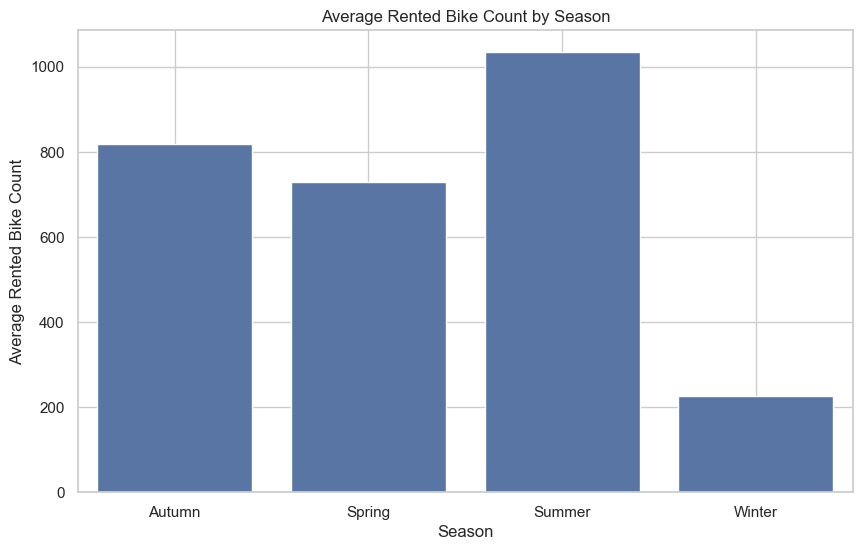

In [110]:
#creating a box plot between rented bike count and seasons
seasonal_avg = df.groupby('Seasons')['Rented Bike Count'].mean().reset_index()

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Seasons', y='Rented Bike Count', data=seasonal_avg)

plt.title('Average Rented Bike Count by Season')
plt.xlabel('Season')
plt.ylabel('Average Rented Bike Count')
plt.grid(True)
plt.show()


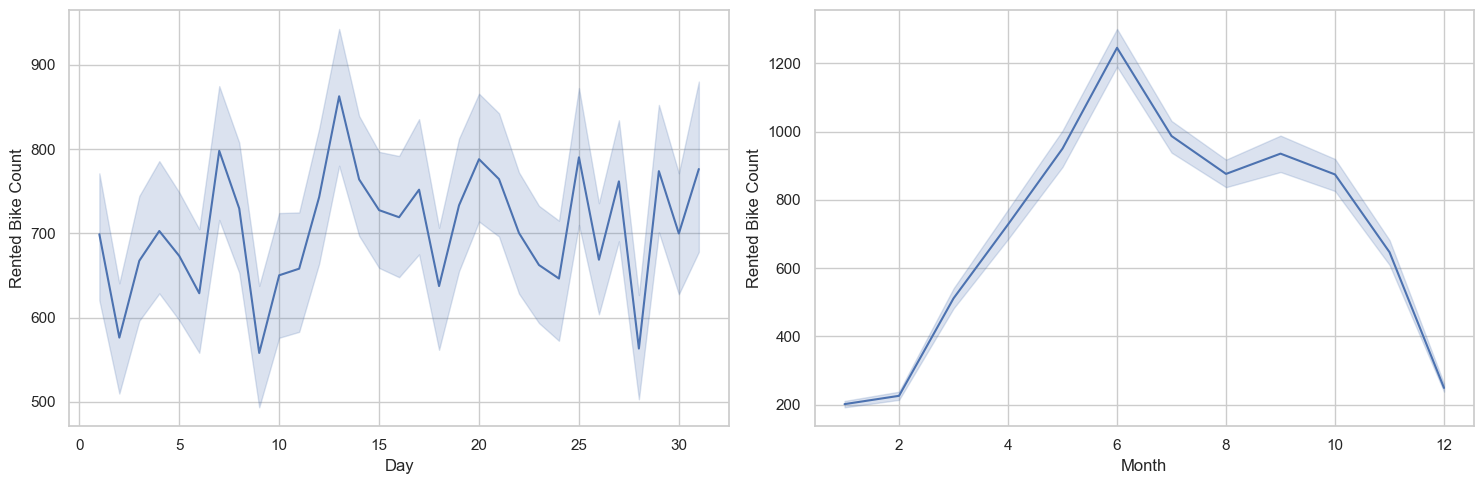

In [111]:
#creating line plot between rented bike count and Day/Month
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x='Day', y='Rented Bike Count', data=df, ax=axs[0])
sns.lineplot(x='Month', y='Rented Bike Count', data=df, ax=axs[1])

plt.tight_layout()
plt.show()

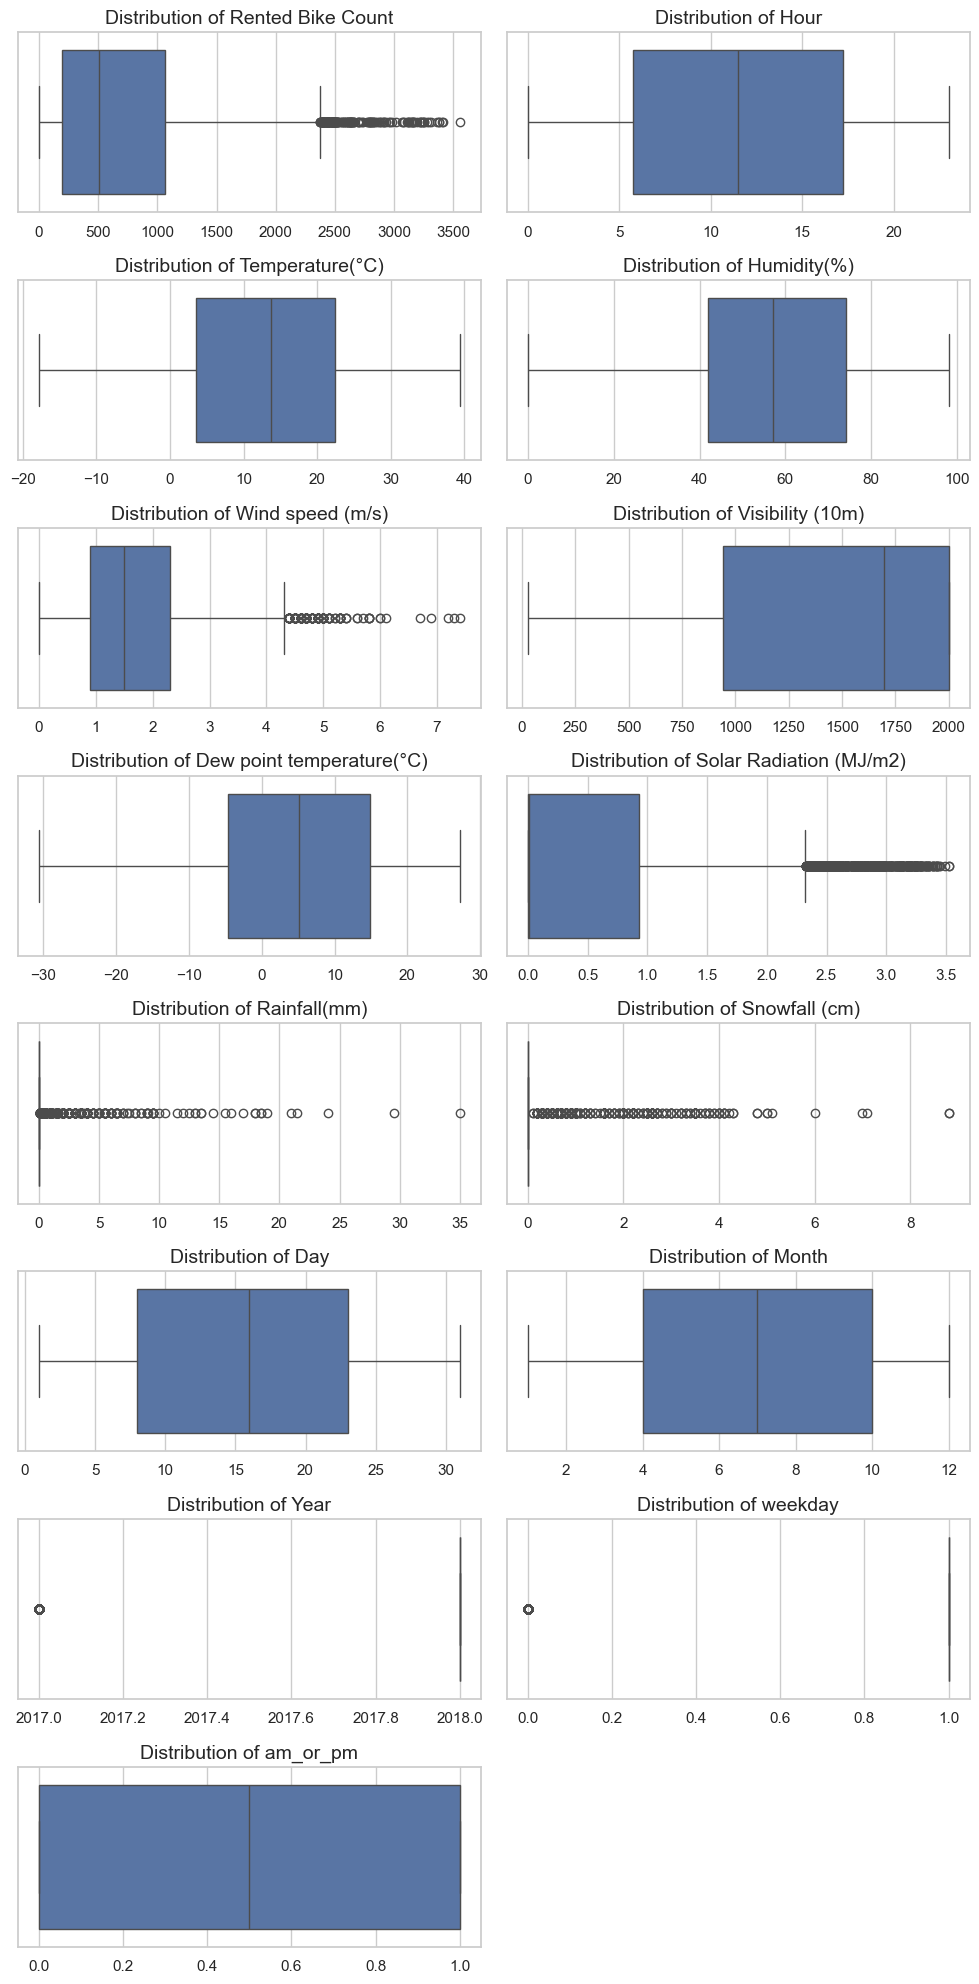

In [112]:
# Creating a box plot for each numeric column
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(10, 20))  # Adjusted figsize to better accommodate the subplots

axes = axes.flatten()

for i, col in enumerate(numeric_features.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')

axes[-1].axis('off')

plt.tight_layout()
plt.show()


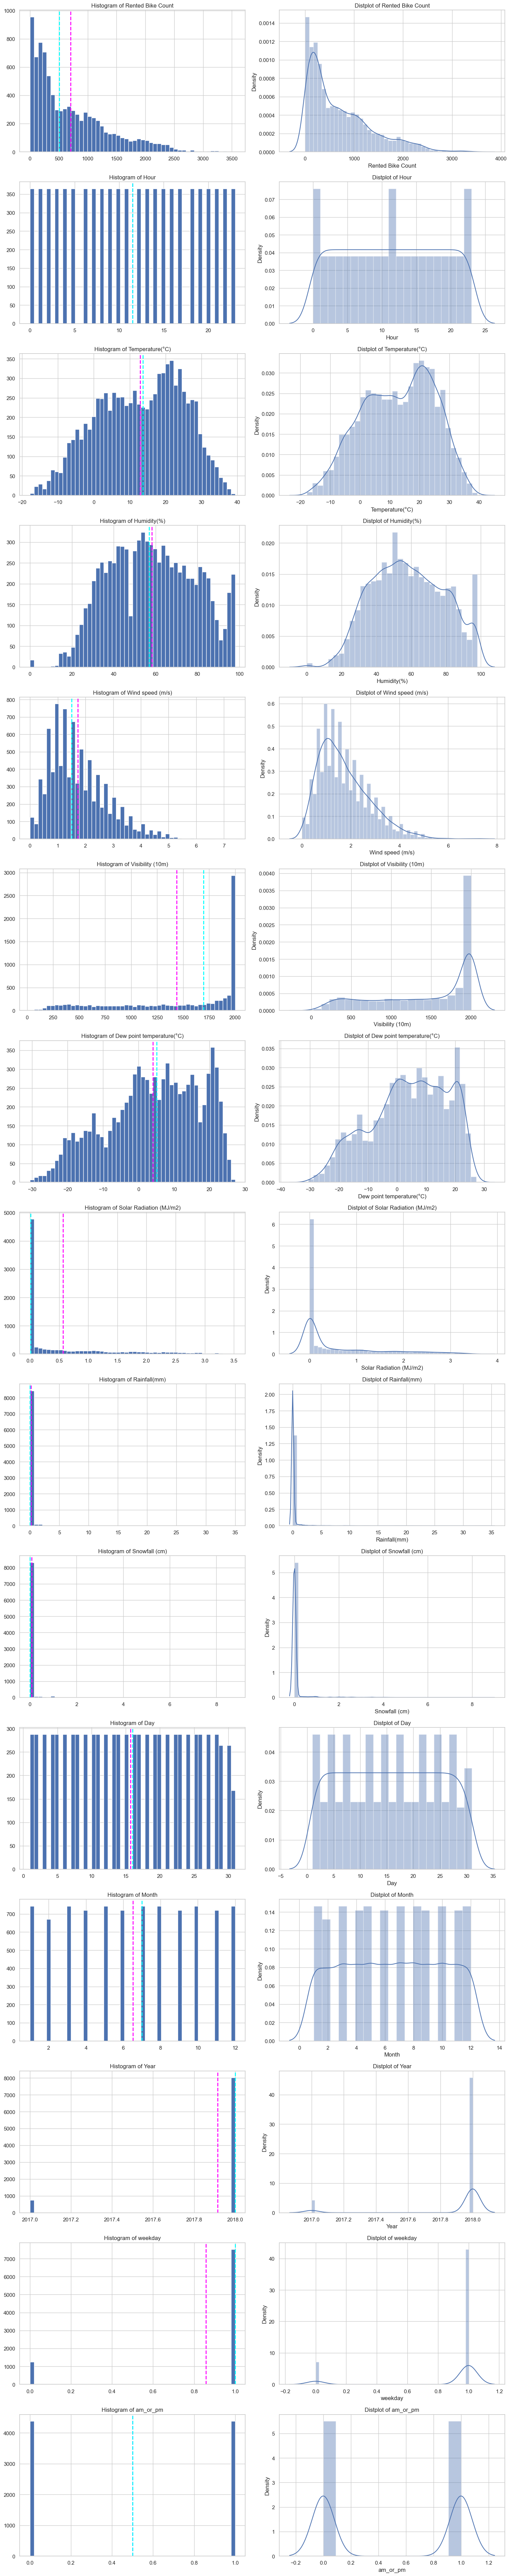

In [113]:
# distribuition of the data for the numerical columns
total_subplots = len(numeric_features.columns) * 2

cols = 2  
rows = total_subplots // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  

for i, column in enumerate(numeric_features.columns):
    feature = df[column]
    
    # Plot the histogram
    ax_hist = axes[2 * i // cols, 2 * i % cols]
    feature.hist(ax=ax_hist, bins=50)
    ax_hist.set_title(f'Histogram of {column}')
    ax_hist.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax_hist.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    
    # Plot the distribution plot
    ax_dist = axes[(2 * i + 1) // cols, (2 * i + 1) % cols]
    sns.distplot(feature, ax=ax_dist)
    ax_dist.set_title(f'Distplot of {column}')

plt.tight_layout()
plt.show()


In [114]:
# Remove outliers for numerical columns
Q1 = df[numeric_features.columns].quantile(0.25)
Q3 = df[numeric_features.columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_features.columns] < (Q1 - 1.5 * IQR)) | (df[numeric_features.columns] > (Q3 + 1.5 * IQR))).any(axis=1)
clean_data = df[~outliers]

clean_data.shape

(5428, 18)

In [115]:
# Using Pandas get Dummies for Encoding categorical features 
new_df=pd.get_dummies(clean_data,drop_first=True)
new_df.head(4)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year,weekday,am_or_pm,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
744,206,0,-3.2,40,0.5,1358,-14.9,0.0,0.0,0.0,1,1,2018,1,0,False,False,True,False,True
745,230,1,-3.3,41,0.7,2000,-14.7,0.0,0.0,0.0,1,1,2018,1,0,False,False,True,False,True
746,178,2,-3.7,42,0.9,2000,-14.7,0.0,0.0,0.0,1,1,2018,1,0,False,False,True,False,True
747,119,3,-4.0,44,1.0,2000,-14.4,0.0,0.0,0.0,1,1,2018,1,0,False,False,True,False,True


In [116]:
columns_to_convert = ['Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes']

for column in columns_to_convert:
    new_df[column] = new_df[column].astype(int)

## Preparing Data for modelling

In [117]:
X = new_df.drop('Rented Bike Count', axis=1)
Y = new_df['Rented Bike Count']


# Train test split our data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.25,random_state=42)

In [118]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [119]:
# Appending all models evalution scores to the corrosponding list after hyperarameter
mean_absolut_error_ht = []
mean_sq_error_ht=[]
root_mean_sq_error_ht=[]
training_score_ht =[]
r2_list_ht=[]
adj_r2_list_ht=[]


# creating a function for fit, predict and evaluting the models and append all evalution score in list 

def score_metrix (model,X_train,X_test,Y_train,Y_test, linear = False):

  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  try:
     # finding the best parameters of the model if any 
   print('*'*20, 'Best Parameters & Best Score', '*'*20)
   print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
  except:
   print('None')
    
  if linear == True:
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    
    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')
  
  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    
    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

    
  # Here we appending the parameters for all models 
  mean_absolut_error_ht.append(MAE)
  mean_sq_error_ht.append(MSE)
  root_mean_sq_error_ht.append(RMSE)
  training_score_ht.append(training)
  r2_list_ht.append(r2)
  adj_r2_list_ht.append(adj_r2)

  
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  if model == lr:
    print("coefficient",model.coef_)
    print('\n')
    print("Intercept",model.intercept_)
  else:
    pass
  print('\n')    

In [120]:
print("*"*25, "Linear Regression", "*"*25)
lr  = LinearRegression()
score_metrix(lr,X_train,X_test,Y_train,Y_test,linear = True)

************************* Linear Regression *************************
Training score  = 0.5641133712162423
******************** Best Parameters & Best Score ********************
None
MAE : 539885.5650259259
MSE : 835901949532.5623
RMSE : 914276.7357493913
R2 : 0.4375224696522191
Adjusted R2 :  0.4295291464834773 

coefficient [ 2.94142320e+02  2.55673578e+02 -1.08398761e+02  1.56603863e+01
  5.29376898e+00  2.36932317e+01 -2.86953919e+01 -1.42108547e-14
  2.84217094e-14 -9.51150571e-01 -7.63409494e+01  1.70530257e-13
 -1.66977543e-13 -7.24265032e+01 -1.29633523e+02 -9.65152501e+01
 -2.20948411e+02  2.24839036e+01  1.92140800e+02]


Intercept 766.9022353230166




In [121]:
print("*"*25, "L1 Regularization", "*"*25)
parameters = {'alpha': [1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20]} #lasso parameters 
L1 = GridSearchCV(Lasso(), parameters, cv=5)
score_metrix(L1,X_train,X_test,Y_train,Y_test,linear = True)

************************* L1 Regularization *************************
Training score  = 0.5641062051212455
******************** Best Parameters & Best Score ********************
The best parameters found out to be :{'alpha': 0.1} 
where model best score is:  0.559519128815406 

MAE : 539820.343197879
MSE : 836223102606.0173
RMSE : 914452.3511949747
R2 : 0.4373063660916022
Adjusted R2 :  0.42930997189245523 





In [122]:
print("*"*25, "L2 Regularization", "*"*25)
parameters = {'alpha': [1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20]} # giving parameters 
L2 = GridSearchCV(Ridge(), parameters, scoring='r2', cv=5)
score_metrix(L2,X_train,X_test,Y_train,Y_test,linear = True)

************************* L2 Regularization *************************
Training score  = 0.5640888378197214
******************** Best Parameters & Best Score ********************
The best parameters found out to be :{'alpha': 5} 
where model best score is:  0.5595188238833666 

MAE : 539721.6338954234
MSE : 836538283215.6168
RMSE : 914624.6679461563
R2 : 0.43709428139554407
Adjusted R2 :  0.42909487327775453 





In [123]:
print("*"*25, "Decision Tree", "*"*25)
param_grid = {'criterion':['squared_error'],#'squared_error', 'absolute_error',],
              'min_samples_leaf':[5],#7,10],
              'max_depth' : [18],#10,25],
              'min_samples_split': [25],#15,35],
              'max_features':['sqrt'],#'sqrt','log2']
              }

decision_tree = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid,cv=5,n_jobs=-1)
score_metrix(decision_tree,X_train,X_test,Y_train,Y_test)

************************* Decision Tree *************************
Training score  = 0.8661003808091956
******************** Best Parameters & Best Score ********************
The best parameters found out to be :{'criterion': 'squared_error', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 25} 
where model best score is:  0.7349371920424609 

MAE : 182.8300914519914
MSE : 80993.51805212328
RMSE : 284.593601565677
R2 : 0.7729199616133714
Adjusted R2 :  0.7696929453610558 





In [124]:
print("*"*25, "Random Forest", "*"*25)
param_grid = {'n_estimators':[150], #100,200]
              'min_samples_leaf':[4], #6,2],
              'max_depth' : [20], #25,30],
              'min_samples_split': [25], #30,20],
              'max_features':['sqrt'], #'sqrt','log2']
              }
random_forest = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,n_jobs=-1,cv=5)
score_metrix(random_forest,X_train,X_test,Y_train,Y_test)

************************* Random Forest *************************
Training score  = 0.8867382812241962
******************** Best Parameters & Best Score ********************
The best parameters found out to be :{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 25, 'n_estimators': 150} 
where model best score is:  0.8345398460254547 

MAE : 166.49196765058235
MSE : 59713.894977520256
RMSE : 244.36426698173418
R2 : 0.832581249835524
Adjusted R2 :  0.8302020753754454 





In [125]:
print("*"*25, "Gradient Boosting", "*"*25)
param_grid={'loss':['huber'],#'squared_error', 'absolute_error','quantile'],
            'min_impurity_decrease':[0.2],#0.2,0.6],
            'criterion':['squared_error'],#'mae'],
            'n_estimators':[1000],#600,400,1000], 
            'learning_rate': [0.03],#0.03,0.1,0.05], 
            'min_samples_leaf':[6],#4,8]
            'max_depth':[30],#15,20,30],
            'subsample':[0.7],#0.5,1.0],
            'max_leaf_nodes':[17],#15,10,20],
            'max_features':['sqrt']#'sqrt', 'log2'] 
            }
gradient_boost = GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid, n_jobs=-1,cv=5,verbose=2)
score_metrix(gradient_boost,X_train,X_test,Y_train,Y_test)

************************* Gradient Boosting *************************
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training score  = 0.9597286879989304
******************** Best Parameters & Best Score ********************
The best parameters found out to be :{'criterion': 'squared_error', 'learning_rate': 0.03, 'loss': 'huber', 'max_depth': 30, 'max_features': 'sqrt', 'max_leaf_nodes': 17, 'min_impurity_decrease': 0.2, 'min_samples_leaf': 6, 'n_estimators': 1000, 'subsample': 0.7} 
where model best score is:  0.907915782468885 

MAE : 115.19852102106866
MSE : 39590.09539760928
RMSE : 198.9725996151462
R2 : 0.8890019769627265
Adjusted R2 :  0.8874245929405065 





In [126]:
all_matrices={'Mean_Absolute_error':mean_absolut_error_ht,'Mean_square_error':mean_sq_error_ht,'Root_Mean_square_error':root_mean_sq_error_ht,'Training_score':training_score_ht,'R2':r2_list_ht,'Adjusted_R2':adj_r2_list_ht}
model_name=['Linear','Lasso','Ridge','Decision_Tree','Random_Forest','Gradient_Boosting']
matrices_df=pd.DataFrame(all_matrices,index=model_name)
matrices_df.sort_values("Adjusted_R2",ascending=False)


,Mean_Absolute_error,Mean_square_error,Root_Mean_square_error,Training_score,R2,Adjusted_R2
Gradient_Boosting,115.198521,3.959010e+04,198.972600,0.959729,0.889002,0.887425
Random_Forest,166.491968,5.971389e+04,244.364267,0.886738,0.832581,0.830202
Decision_Tree,182.830091,8.099352e+04,284.593602,0.866100,0.772920,0.769693
Linear,539885.565026,8.359019e+11,914276.735749,0.564113,0.437522,0.429529
Lasso,539820.343198,8.362231e+11,914452.351195,0.564106,0.437306,0.429310
Ridge,539721.633895,8.365383e+11,914624.667946,0.564089,0.437094,0.429095


In [136]:
import pickle

# Save the model to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(gradient_boost, file)
